## 2.使用KNN算法判断肿瘤类别

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3)

In [3]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [4]:
accuracy= knn.score(X_test, y_test)

In [5]:
accuracy

0.9298245614035088

## 3.了解KNN算法中的参数

In [6]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

## 4.确定K的最佳取值

In [10]:
error_rate = []   # 记录不同k值错误率的列表
for k in range(3, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
     # 稍后绘图我们希望看到错误率随着k增大，误差减小的情况
     # 而knn.score返回的是准确率，因此需要 1 - 准确率
    error_rate.append(1 - knn.score(X_test, y_test))


<AxesSubplot:>

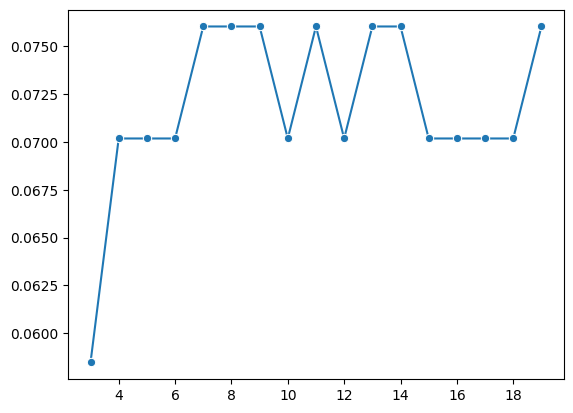

In [17]:
sns.lineplot(x=range(3, 20), y=error_rate, marker='o')

## 5.K近邻模型的扩展
## 5.1标准化问题

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
 
ss_knn = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=8)
 )
 
ss_knn.fit(X_train, y_train)
ss_knn.score(X_test, y_test)
mm_knn = make_pipeline(
    MinMaxScaler(),
    KNeighborsClassifier(n_neighbors=8)
 )
 
mm_knn.fit(X_train, y_train)
mm_knn.score(X_test, y_test)

0.9473684210526315

## 5.2不同的距离计算方法

In [19]:
mht_knn = make_pipeline(
MinMaxScaler(),
    KNeighborsClassifier(n_neighbors=8, metric='manhattan')
 )
mht_knn.fit(X_train, y_train)
mht_knn.score(X_test, y_test)
 # 基于余弦夹角
cos_knn = make_pipeline(
MinMaxScaler(),
    KNeighborsClassifier(n_neighbors=8, metric='cosine')
 )
cos_knn.fit(X_train, y_train)
cos_knn.score(X_test, y_test)


0.9064327485380117

## 5.3基于半径的近邻算法

In [20]:
from sklearn.neighbors import RadiusNeighborsClassifier
mm_rnn_base = make_pipeline(
    MinMaxScaler(),
     # 由于经过归一化，因此点与点之间的距离应该不大。模型默认半径为1
     # 对于一些异常点，可能在半径范围内，找不到任何一个相邻的点。
     # 对于这部分无法归类的异常点，需要指定outlier_label, 以免模型报错
    RadiusNeighborsClassifier(radius=1.0, outlier_label=2)
 )
mm_rnn_base.fit(X_train, y_train)
mm_rnn_base.score(X_test, y_test)


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\neighbors\_classification.py:669: UserWarning: Outlier label 2 is not in training classes. All class probabilities of outliers will be assigned with 0.
  "".format(self.outlier_label_[k])


0.8596491228070176

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\neighbors\_classification.py:669: UserWarning: Outlier label 2 is not in training classes. All class probabilities of outliers will be assigned with 0.
  "".format(self.outlier_label_[k])
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\neighbors\_classification.py:669: UserWarning: Outlier label 2 is not in training classes. All class probabilities of outliers will be assigned with 0.
  "".format(self.outlier_label_[k])
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\neighbors\_classification.py:669: UserWarning: Outlier label 2 is not in training classes. All class probabilities of outliers will be assigned with 0.
  "".format(self.outlier_label_[k])
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\neighbors\_classification.py:669: UserWarning: Outlier label 2 is not in training classes. All class probabilities of ou

<AxesSubplot:>

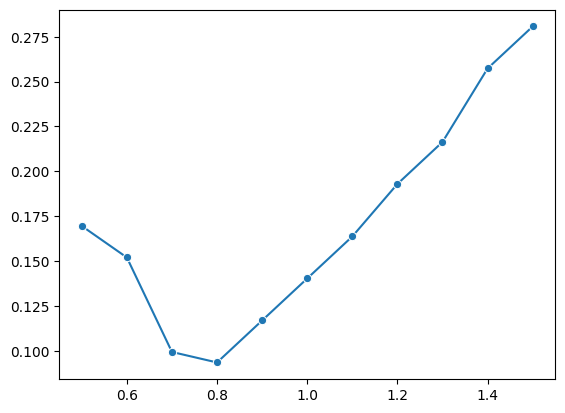

In [23]:
rnn_error = []  # 记录不同半径对应的模型错误率
for i in range(11):
    mm_rnn = make_pipeline(
        MinMaxScaler(),
        RadiusNeighborsClassifier(radius=0.5 + i * 0.1, outlier_label=2)
    )
    mm_rnn.fit(X_train, y_train)
    rnn_error.append(1 - mm_rnn.score(X_test, y_test))
 # 绘制错误率曲线
sns.lineplot(x=[0.5+x*0.1 for x in range(11)], y=rnn_error, marker='o')


## 6.与其他模型对比

In [24]:
from sklearn.linear_model import LogisticRegression
 
 # 基于MinMaxScaler的逻辑回归
mm_lr = make_pipeline(
    MinMaxScaler(),
    LogisticRegression()
 )
mm_lr.fit(X_train, y_train)
mm_lr.score(X_test, y_test)
 # 基于StandardScaler的逻辑回归
ss_lr = make_pipeline(
    StandardScaler(),
    LogisticRegression()
 )
ss_lr.fit(X_train, y_train)
ss_lr.score(X_test, y_test)


0.9766081871345029

In [25]:
from sklearn.svm import SVC
 
 # 基于MinMaxScaler的支持向量机
mm_svc = make_pipeline(
    MinMaxScaler(),
    SVC()
 )
mm_svc.fit(X_train, y_train)
mm_svc.score(X_test, y_test)
 # 基于StandardScaler的支持向量机
ss_svc = make_pipeline(
    StandardScaler(),SVC()
 )
ss_svc.fit(X_train, y_train)
ss_svc.score(X_test, y_test)


0.9649122807017544